Uppdrag 1

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

# read in the file, found a lot of NaN
df_file = './Data/riket2023_åk9_np.xlsx'

# reads all sheets into a sictionary of DataFrames
# got information on https://www.geeksforgeeks.org/how-to-read-excel-multiple-sheets-in-python-pandas/
df_sheets = pd.read_excel(df_file, sheet_name=None)
sheets = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# a dictionary to save the cleaned sheets
cleaned_data = {}

df_sheets["Engelska"].head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grundskolan - Resultat nationella prov årskurs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Engelska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Valt läsår: 2022/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Antal elever med provbetyg A-F,NaN,NaN,Andel (%) med provbetyg A-E,NaN,NaN,Genomsnittlig betygspoäng,NaN,NaN
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
9,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4


In [64]:
# I think I made a mistake in reading in the sheets, cause row 7 kept coming up
# and I couldn't use skiprows cause then the columns did not read in correctly
# so I decided to remove it instead
for sheet in sheets:
    df_sheets[sheet] = df_sheets[sheet].drop(index=7)

In [65]:
# a function to rename all the columns in every sheet
def rename_all_columns(df):
    return df.rename(columns={
        'Unnamed: 0': 'Plats', 
        'Unnamed: 1': 'Huvudman', 
        'Unnamed: 2': 'Totalt (A-F)', 
        'Unnamed: 3': 'Flickor (A-F)', 
        'Unnamed: 4': 'Pojkar (A-F)', 
        'Unnamed: 5': 'Totalt (A-E)', 
        'Unnamed: 6': 'Flickor (A-E)', 
        'Unnamed: 7': 'Pojkar (A-E)', 
        'Unnamed: 8': 'Totalt (Poäng)', 
        'Unnamed: 9': 'Flickor (Poäng)', 
        'Unnamed: 10': 'Pojkar (Poäng)'
    })

In [66]:
# rename the sheets with the function
# using a for loop to go through all sheets
for s in sheets:
    sheet = df_sheets[s]
    sheet = rename_all_columns(sheet)
    cleaned_data[s] = sheet

cleaned_data["Engelska"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 11
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Plats            7 non-null      object
 1   Huvudman         4 non-null      object
 2   Totalt (A-F)     5 non-null      object
 3   Flickor (A-F)    4 non-null      object
 4   Pojkar (A-F)     4 non-null      object
 5   Totalt (A-E)     5 non-null      object
 6   Flickor (A-E)    4 non-null      object
 7   Pojkar (A-E)     4 non-null      object
 8   Totalt (Poäng)   5 non-null      object
 9   Flickor (Poäng)  4 non-null      object
 10  Pojkar (Poäng)   4 non-null      object
dtypes: object(11)
memory usage: 1.0+ KB


In [67]:
# remove the NaNs from each sheet
for d in sheets:
    cleaned_data[d] = cleaned_data[d].dropna().reset_index(drop=True)

cleaned_data["Engelska"].head()

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17,16.8
3,Riket,Skolverket,49,24,25,100,100,100,18.5,18.9,18.2


In [68]:
# group huvudman and totalt (poäng) to use sum to calculate the total sum of poäng
# first a dictionary to save the grouped data
group_sheets = {}

for g in sheets:
    group_sheets[g] = cleaned_data[g].groupby(["Huvudman"]).agg({"Totalt (Poäng)": "sum"}).reset_index()

group_sheets["Svenska som andraspråk"].head()

,Huvudman,Totalt (Poäng)
0,Enskild,11.1
1,Kommunal,9
2,Samtliga,9.4
3,Skolverket,..


In [69]:
# get the DataFrame from each subject from the dictionary
df_english = group_sheets["Engelska"] 
df_math = group_sheets["Matematik"]
df_swedish = group_sheets["Svenska"] 
df_swedish_two = group_sheets["Svenska som andraspråk"]

In [70]:
# since "Svenska som andraspråk" only contains two ".." I need to convert to NaN
# with replace
df_swedish_two["Totalt (Poäng)"] = df_swedish_two["Totalt (Poäng)"].replace("..", np.nan)

C:\Users\elvir\AppData\Local\Temp\ipykernel_11396\1874139845.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [71]:
# tried to create different colours for every bar in the chart
# found info on https://python-graph-gallery.com/3-control-color-of-barplots/

# create a function so that I can assign teh colors
def bar_colour(subjects_df):
    colour_huvudman = {
    'Skolverket' : 'purple',
    'Kommunal': 'green',
    'Enskild': 'blue',
    'Samtliga': 'orange'
}
    return[colour_huvudman.get(huvudman, 'black') for huvudman in subjects_df["Huvudman"]]

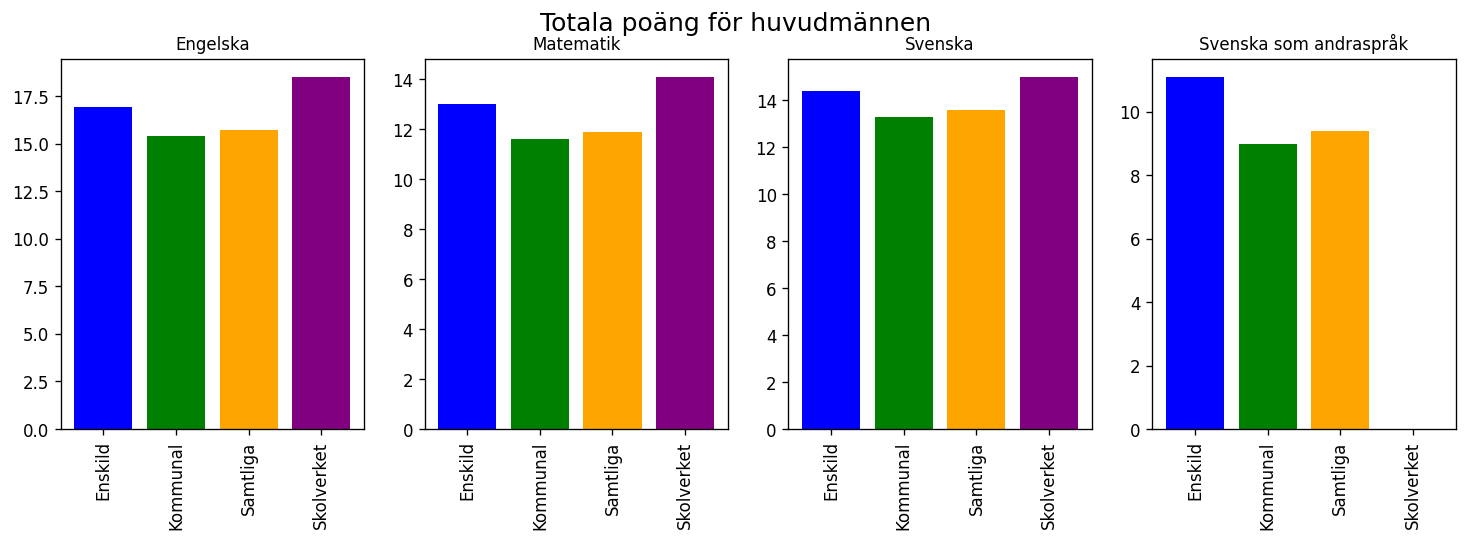

In [72]:
# plot the barchart, need to use subplots 
# categorys = the different subjects for the total points in the total subjects
# english, swedish, maths and swedish as second language
fig, axs = plt.subplots(1, 4, dpi = 120, figsize =(15, 4))

# main title
fig.suptitle("Totala poäng för huvudmännen", fontsize=15) 

# first plot, english
axs[0].bar(df_english['Huvudman'], 
    df_english['Totalt (Poäng)'],
    color = bar_colour(df_english)
)
axs[0].set_title("Engelska", fontsize = 10)
axs[0].set_xticks([0,1,2,3])
axs[0].tick_params(axis='x', rotation=90)

# second plot, math
axs[1].bar(df_math['Huvudman'], 
    df_math['Totalt (Poäng)'],
    color = bar_colour(df_math)
)
axs[1].set_title("Matematik", fontsize = 10)
axs[1].set_xticks([0,1,2,3])
axs[1].tick_params(axis='x', rotation=90)

# third plot for swedish
axs[2].bar(df_swedish['Huvudman'], 
    df_swedish['Totalt (Poäng)'],
    color = bar_colour(df_swedish)
)
axs[2].set_title("Svenska", fontsize = 10)
axs[2].set_xticks([0,1,2,3])
axs[2].tick_params(axis='x', rotation=90)

# fourth plot for swedish as second language
axs[3].bar(df_swedish_two['Huvudman'], 
    df_swedish_two['Totalt (Poäng)'].fillna(0),
    color = bar_colour(df_swedish_two)
)
axs[3].set_title("Svenska som andraspråk", fontsize = 10)
axs[3].set_xticks([0,1,2,3])
axs[3].tick_params(axis='x', rotation=90)

plt.show()

Uppgift 2

In [73]:
# read in the specific Tabell from the excel file
# lots of NaN values
df_tabell_sheet = pd.read_excel("./Data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")
df_tabell_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Grundskolan – Betyg och Prov – Riksnivå  32 non-null     object
 1   Unnamed: 1                               26 non-null     object
 2   Unnamed: 2                               24 non-null     object
 3   Unnamed: 3                               24 non-null     object
 4   Unnamed: 4                               25 non-null     object
 5   Unnamed: 5                               24 non-null     object
 6   Unnamed: 6                               24 non-null     object
 7   Unnamed: 7                               25 non-null     object
 8   Unnamed: 8                               24 non-null     object
 9   Unnamed: 9                               24 non-null     object
dtypes: object(10)
memory usage: 2.9+ KB


In [74]:
# let's rename the columns first
df_tabell_sheet = df_tabell_sheet.rename(columns ={
        'Grundskolan – Betyg och Prov – Riksnivå': 'Kategorier',
        'Unnamed: 1': 'Totalt (16 Ämnen)', 
        'Unnamed: 2': 'Flickor (16 Ämnen)', 
        'Unnamed: 3': 'Pojkar (16 Ämnen)', 
        'Unnamed: 4': 'Totalt (17 Ämnen)', 
        'Unnamed: 5': 'Flickor (17 Ämnen)', 
        'Unnamed: 6': 'Pojkar (17 Ämnen)', 
        'Unnamed: 7': 'Total (%)', 
        'Unnamed: 8': 'Flickor (%)', 
        'Unnamed: 9': 'Pojkar (%)', 
    })

df_tabell_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kategorier          32 non-null     object
 1   Totalt (16 Ämnen)   26 non-null     object
 2   Flickor (16 Ämnen)  24 non-null     object
 3   Pojkar (16 Ämnen)   24 non-null     object
 4   Totalt (17 Ämnen)   25 non-null     object
 5   Flickor (17 Ämnen)  24 non-null     object
 6   Pojkar (17 Ämnen)   24 non-null     object
 7   Total (%)           25 non-null     object
 8   Flickor (%)         24 non-null     object
 9   Pojkar (%)          24 non-null     object
dtypes: object(10)
memory usage: 2.9+ KB


In [75]:
# clean the data
df_cleaned_data = df_tabell_sheet.dropna()

df_cleaned_data.isnull().sum()

Kategorier            0
Totalt (16 Ämnen)     0
Flickor (16 Ämnen)    0
Pojkar (16 Ämnen)     0
Totalt (17 Ämnen)     0
Flickor (17 Ämnen)    0
Pojkar (17 Ämnen)     0
Total (%)             0
Flickor (%)           0
Pojkar (%)            0
dtype: int64

In [76]:
# filter out the years from the Kategori tabell
df_years_filtered = df_tabell_sheet.loc[df_tabell_sheet['Kategorier'].isin(['2018/19', '2019/20', '2020/21',
       '2021/22', '2022/23'])]

In [77]:
# plotly line diagram for students with no passing grade
# found info on https://plotly.com/python/plotly-express/
fig = px.line(df_years_filtered , x = "Kategorier", y = ["Total (%)", "Flickor (%)", "Pojkar (%)"], 
title = "Andel elever som saknar godkänt betyg",
labels = {"value": "Andel (%)", "variable": "Kategorier", "Kategorier": "Läsår"}, 
line_shape="spline", render_mode="svg", 
markers = True)

fig.write_html("Visualiseringar/Uppgift_2a.html")
fig.show() 

In [78]:
# plotly diagram for meritvärde för 16 ämnen, for pojkar, flickor och totalt
fig = px.line(df_years_filtered , x = "Kategorier", y = ["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"], 
title = "Meritvärde för 16 ämnen",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": "Läsår",}, 
line_shape="spline", 
render_mode="svg",
markers = True)

fig.write_html("Visualiseringar/Uppgift_2b.html")
fig.show()

Bonus

In [79]:
# I filter the DataFrame to select the rows in Kategorier that I want
# I use .loc[] to filter the data
df_huvudman_data = df_cleaned_data.loc[df_cleaned_data['Kategorier'].isin(['Kommun', 'Enskild'])]

# need to convert the values from object to numerics
df_huvudman_data[["Total (%)", "Flickor (%)", "Pojkar (%)"]] = df_huvudman_data[["Total (%)", "Flickor (%)", "Pojkar (%)"]].apply(pd.to_numeric)

C:\Users\elvir\AppData\Local\Temp\ipykernel_11396\2873378320.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
# bar chart for the Huvudman
fig = px.bar(df_huvudman_data, 
            x = "Kategorier", 
            y=["Total (%)", "Flickor (%)", "Pojkar (%)"], 
            title="Andel elever som saknar godkänt betyg",
            labels={"value": "Andel %", "variable": "Kategorier", "Kategorier": "Huvudman"},
            barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_1.html")
fig.show()

In [81]:
df_background_data = df_cleaned_data.loc[df_cleaned_data['Kategorier'].isin(['Elever med svensk bakgrund', 'Elever med utländsk bakgrund'])]

df_background_data[["Totalt (17 Ämnen)", "Flickor (17 Ämnen)", "Pojkar (17 Ämnen)"]] = df_background_data[["Totalt (17 Ämnen)", "Flickor (17 Ämnen)", "Pojkar (17 Ämnen)"]].apply(pd.to_numeric)

C:\Users\elvir\AppData\Local\Temp\ipykernel_11396\1408469575.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
 # a bar chart for students backgrounds
fig = px.bar(df_background_data , 
x = "Kategorier", 
y = ["Totalt (17 Ämnen)", "Flickor (17 Ämnen)", "Pojkar (17 Ämnen)"], 
title = "Meritvärde för 17 ämnen baserat på elevers bakgrund",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": ""}, 
barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_2.html")
fig.show()

In [83]:
df_parents_data = df_cleaned_data.loc[df_cleaned_data['Kategorier'].isin(['Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'])]

df_parents_data[["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"]] = df_parents_data[["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"]].apply(pd.to_numeric)

df_parents_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 29 to 31
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kategorier          3 non-null      object 
 1   Totalt (16 Ämnen)   3 non-null      float64
 2   Flickor (16 Ämnen)  3 non-null      float64
 3   Pojkar (16 Ämnen)   3 non-null      float64
 4   Totalt (17 Ämnen)   3 non-null      object 
 5   Flickor (17 Ämnen)  3 non-null      object 
 6   Pojkar (17 Ämnen)   3 non-null      object 
 7   Total (%)           3 non-null      object 
 8   Flickor (%)         3 non-null      object 
 9   Pojkar (%)          3 non-null      object 
dtypes: float64(3), object(7)
memory usage: 264.0+ bytes


C:\Users\elvir\AppData\Local\Temp\ipykernel_11396\4101084330.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
# a bar char on the parents education
fig = px.bar(df_parents_data,
x = "Kategorier", 
y = ["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"], 
title = "Meritvärde för 16 ämnen baserat på föräldrarnas utbildning",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": "Utbildning"}, 
barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_3.html")
fig.show()